# Feed Forward Neural Network with Backpropagation - Relu Function

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
%matplotlib inline 



In [2]:
#Download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Expected number: 2


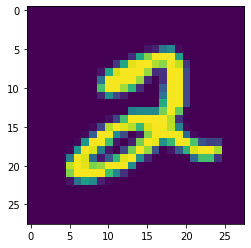

In [3]:
#Plot the first image in the dataset
plt.imshow(X_train[5])
print("Expected number: {}".format(y_train[5]))

In [4]:
# Reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [5]:
# One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [6]:
# Create model
model = Sequential()

In [7]:
# Use the "relu" function, instead of the "sigmoid" function
model.add(Dense(64, activation='relu',input_shape=(28,28,1)))

In [8]:
model.add(Dense(32, activation='relu'))

In [9]:
model.add(Flatten())

In [10]:
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 28, 64)        128       
_________________________________________________________________
dense_1 (Dense)              (None, 28, 28, 32)        2080      
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                250890    
Total params: 253,098
Trainable params: 253,098
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model using "Adam" optimizer and "CCE" objective function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 28, 64)        128       
_________________________________________________________________
dense_1 (Dense)              (None, 28, 28, 32)        2080      
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                250890    
Total params: 253,098
Trainable params: 253,098
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1)

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 39s 644us/sample - loss: 0.5111 - accuracy: 0.8929 - val_loss: 0.3216 - val_accuracy: 0.9107


In [15]:
# relu is usually superior to sigmoid for classification tasks with multiple layers
scores=model.evaluate(X_test,y_test)
print("Baseline accuracy: {:.2f}".format(scores[1]*100))

10000/10000 [==============================] - 2s 229us/sample - loss: 0.3216 - accuracy: 0.9107
Baseline accuracy: 91.07


Expected number: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


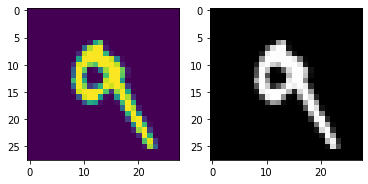

In [16]:
# Plot a image in the dataset (in color and grayscale)
index=0
plt.subplot(121)
plt.imshow(X_test[7])
plt.subplot(122)
plt.imshow(X_test[7],cmap=plt.get_cmap('gray'))
print("Expected number: {}".format(y_train[index]))

In [17]:
import numpy as np
print("Expected: {}".format(y_test[7]))
x1 = np.expand_dims(X_test[7],axis=0)
preds = model.predict_classes(x1)
prob = model.predict(x1)
print(preds)
print(prob)

Expected: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[9]
[[2.4050109e-07 4.1103460e-02 7.2219037e-04 4.3177395e-04 7.0387055e-03
  1.3195843e-02 2.8071037e-04 4.6527063e-04 1.7762874e-03 9.3498552e-01]]
